imports, webdriver

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import statistics

query = input("enter search query bitch: ")
driver = webdriver.Chrome()

driver.get("https://www.ebay.com/")

elem = driver.find_element(By.XPATH, '//*[@id="gh-ac"]')
elem.clear()
elem.send_keys(query)
elem.send_keys(Keys.RETURN)

In [ ]:
raw_prices = driver.find_elements(By.CLASS_NAME, 's-item__price')
raw_names = driver.find_elements(By.CLASS_NAME, 's-item__title')

pricesList = []
namesList = []
pricesList_num = []

for element in raw_prices:
    price = element.text.replace('$', '')
    pricesList.append(price)

    if ' to ' in price:
        #i.e. 10.00 to 20.00
        price = (float(price.split(' to ')[0]) + float(price.split(' to ')[1])) / 2
    pricesList_num.append(price)

for element in raw_names:
    namesList.append(element.text)

namesList.pop(0)
pricesList.pop(0)
pricesList_num.pop(0)

pricesList_float = []
for item in pricesList_num:
    pricesList_float.append(round(float(item), 2))

item_name_and_price = zip(namesList, pricesList_float)

sorted_list = sorted(item_name_and_price, key=lambda x: x[1])


for item in sorted_list:
    print(item)


In [8]:
print(pricesList_float)

[31.99, 31.99, 152.5, 28.0, 43.0, 40.0, 24.99, 29.0, 18.95, 12.99, 80.0, 49.99, 75.0, 25.0, 49.99, 80.0, 28.72, 5.5, 49.99, 150.0, 14.99, 39.99, 50.0, 14.99, 13.0, 27.95, 179.99, 10.5, 44.95, 120.0, 44.99, 77.69, 104.99, 40.0, 25.0, 19.99, 81.0, 24.99, 100.0, 65.0, 100.0, 20.0, 24.99, 41.0, 24.99, 39.95, 35.0, 50.0, 15.0, 104.99, 25.0, 10.0, 79.99, 21.99, 16.0, 139.5, 39.9, 25.0, 29.99, 1175.0, 61.0, 27.99, 30.0, 35.0, 27.99, 17.0, 18.88, 16.0, 200.0, 14.99, 102.5, 20.5, 8.5, 29.99, 2.25, 10.5, 14.99, 32.95, 18.88, 81.0, 27.0, 5.5, 49.99, 10.5, 0.99, 25.0, 10.0, 19.99, 10.99, 15.5, 20.0, 30.0, 25.49, 25.49, 25.0, 1175.0, 1.04, 8.0, 15.0, 31.99, 20.0, 41.0, 31.5, 32.98, 18.0, 50.0, 14.99, 22.49, 40.0, 29.0, 28.0, 11.99, 39.99, 19.99, 2.25, 30.0, 120.0, 90.0, 150.0, 9.5, 9.99, 41.0, 29.99, 28.88, 22.5, 60.0, 31.99, 22.49, 23.99, 20.0, 19.99, 79.99, 20.5, 15.0, 10.0, 4.99, 9.99, 39.9, 114.74, 74.83, 18.88, 23.79, 4.99, 25.0, 32.0, 29.95, 500.0, 5.5, 104.99, 49.99, 179.99, 19.95, 14.95, 29

In [9]:
n = 0
for item in pricesList_float:
    if isinstance(item, float) == True:
        n += 1
    if n == len (pricesList_float):
        print("OK")

OK


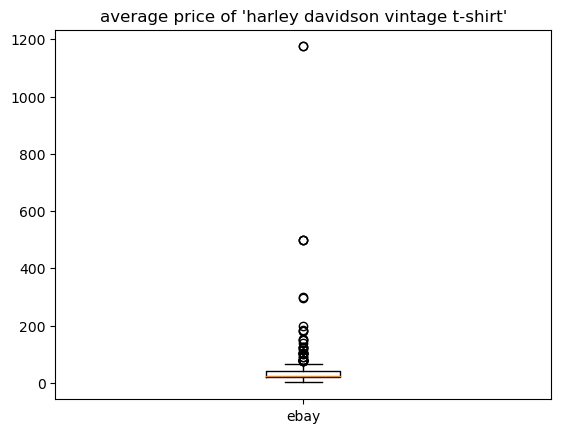

median: 25.0, mean: 48.90879478827362


In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm
import statistics

plt.boxplot(pricesList_float)
plt.title("average price of '" + query + "'")
plt.xticks([1], ['ebay'])
plt.show()

print(f"median: {statistics.median(pricesList_float)}, mean: {statistics.mean(pricesList_float)}")

In [3]:
import time

pricesList = []
namesList = []
pricesList_num = []

for _ in range(5):
    raw_prices = driver.find_elements(By.CLASS_NAME, 's-item__price')
    raw_names = driver.find_elements(By.CLASS_NAME, 's-item__title')

    for element in raw_prices:
        price = element.text.replace('$', '')
        price = price.replace(',', '')
        if price != '':
            pricesList.append(price)

        if ' to ' in price:
            #i.e. 10.00 to 20.00
            price = (float(price.split(' to ')[0]) + float(price.split(' to ')[1])) / 2
        if price != '':
            pricesList_num.append(price)

    for element in raw_names:
        namesList.append(element.text)

    print("going to next page.")
    time.sleep(1)
    next_button = driver.find_element(By.CLASS_NAME, "pagination__next")
    next_button.click()
    time.sleep(1)

('Vintage Harley-Davidson Fat Boys Dominate Tee Shirt Downtown Seattle Black L', 5.5)
("vintage Harley Davidson T shirt Original Hard Drive 90's H-D Daytona Beac tee", 10.0)
('VTG HARLEY- DAVIDSON RACING BLACK/ORANGE S/S MOTORCYCLE COTTON T-SHIRT M/MINT', 10.5)
('Harley Davidson T-Shirt Large Butte, Montana Copper Canyon Rare Black Vintage', 12.99)
('VTG Snap On Motorcycle Stand Alone Graphic T Shirt Size Large Harley Davidson', 13.0)
("Vtg 90's Harley Davidson Motorcycle Columbus Georgia Black T Shirt Sz L USA Made", 14.99)
('Vintage Harley Davidson Motorcycles Skull T Shirt Adult Medium Black Mens', 14.99)
('Vintage Harley Davidson T-Shirt Sz M Feel the Freedom Long Sleeve Eagle 90s USA', 15.0)
('Vintage Y2K Barnett Harley-Davidson El Paseo-Texas Crazy Clown Blue T-shirt 2XL', 16.0)
('Vintage Harley Davidson Short Sleeve T-Shirt Large 2003 Maui Hawaii Motorcycle', 18.95)
('Vintage 3D Emblem 1988 Harley Davidson Pit-bull The Strong Survive Shirt XL', 19.99)
('Vintage Harley-Davidson S

In [6]:
pricesList_float = []
for item in pricesList_num:
    pricesList_float.append(round(float(item), 2))

item_name_and_price = zip(namesList, pricesList_float)

sorted_list = sorted(item_name_and_price, key=lambda x: x[1])


for item in sorted_list:
    print(item)

('1990s Vintage T-Shirt Harley Davidson XXXL', 0.99)
('Vintage Harley Davidson MotorCycles Gray T-Shirt Size XL Danbury Connecticut', 1.04)
('harley davidson shirt vintage', 2.25)
('Vintage Harley Davidson Shirt Lightning Print All Over Biker Thunder Chrome Rare', 2.25)
('Vintage Harley Davidson T Shirt Mens Size Large Chicago, Illinois - Black', 3.99)
('Vintage Y2K Barnett Harley-Davidson El Paseo-Texas Crazy Clown Blue T-shirt 2XL', 4.99)
('Harley Davidson VTG 90s Single Stitch Classic 80s Shirt Motorcycle Biker', 4.99)
("VINTAGE U.S.A MEN'S LARGE 1985 HERITAGE HARLEY DAVIDSON LIVE FREE OR DIE T-SHIRT", 4.99)
('Vintage Harley-Davidson Fat Boys Dominate Tee Shirt Downtown Seattle Black L', 5.5)
('Vintage Harley Davidson 1987 Softail Speed Limit Seventy T Shirt Jumbo Size', 5.5)
('Vintage Harley Davidson 1987 Rebel Rider Speed Limit Seventy T Shirt Jumbo XL', 5.5)
('Vintage Harley Davidson Bike Week 1999 Shirt Size L Daytona', 5.99)
('Vintage ~ AUTHENTIC ~ Harley Davidson T Shirt Black